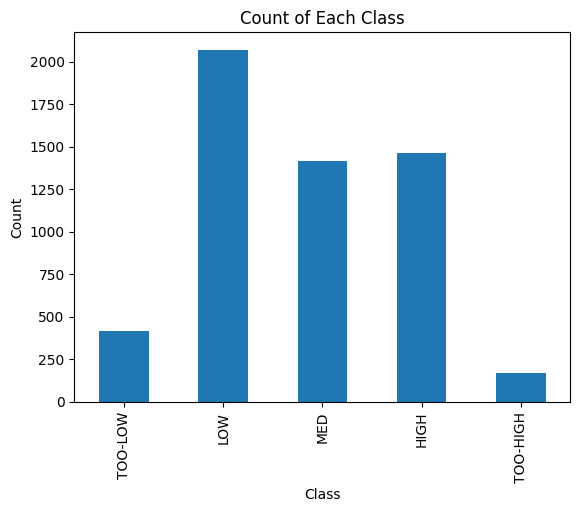

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the classified csv file as a DataFrame
df = pd.read_csv('data_2013/2013_ids_classified.csv')

# Define the desired order of the bars
desired_order = ["TOO-LOW", "LOW", "MED", "HIGH", "TOO-HIGH"]

# Create the histogram with bars in the desired order
df['class_'].value_counts().reindex(desired_order).plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')
plt.show()


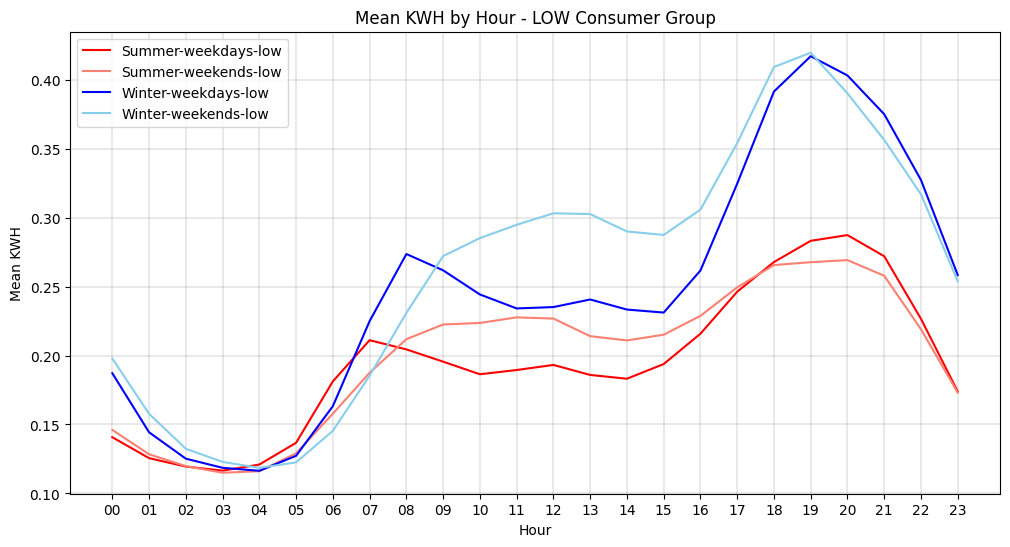

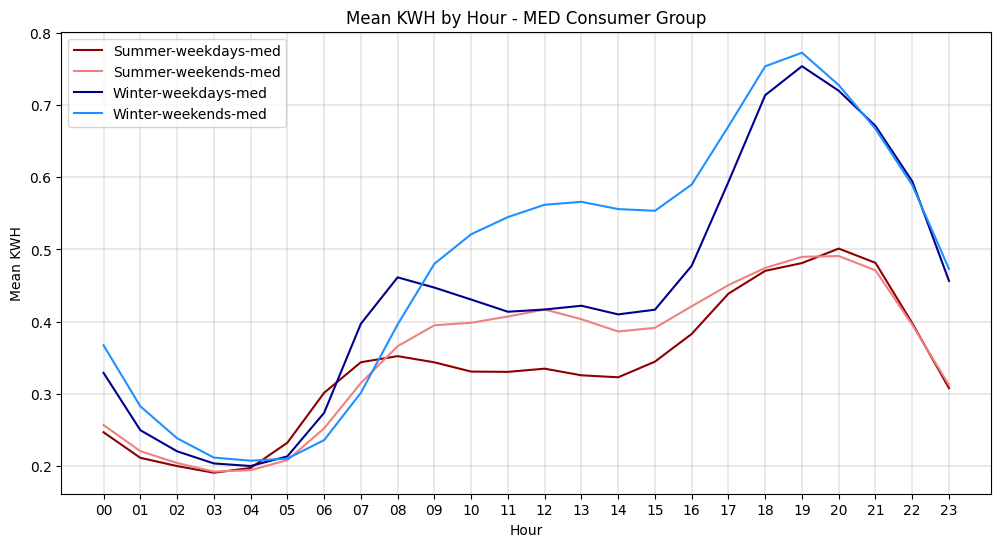

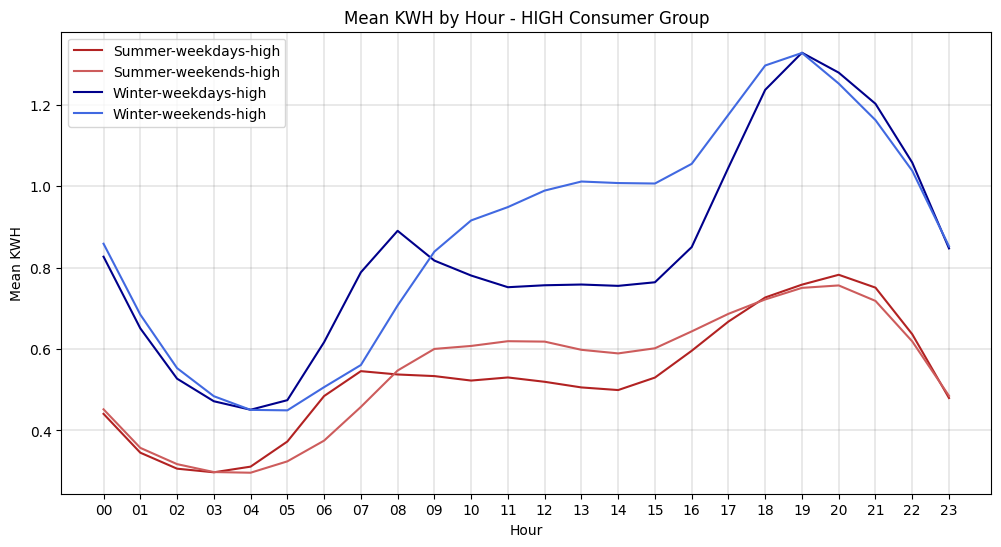

In [3]:
# read in the 2013_ids_classified csv and create a list of all LCLids that match each of the classifications

class_df = pd.read_csv('data_2013/2013_ids_classified.csv')
# convert this df into a dictionary where the keys are the LCLid column and the values are the class_ column
class_dict = class_df.set_index('LCLid')['class_'].to_dict()

# Read the four CSV files into dataframes
df_summer_wd = pd.read_csv('data_2013/summary/summer_wd.csv')
df_summer_we = pd.read_csv('data_2013/summary/summer_we.csv')
df_winter_wd = pd.read_csv('data_2013/summary/winter_wd.csv')
df_winter_we = pd.read_csv('data_2013/summary/winter_we.csv')



# now add a class_ column which is assigned by referring to the class_dict dictionary
df_summer_wd['class_'] = df_summer_wd['LCLid'].map(class_dict)
df_summer_we['class_'] = df_summer_we['LCLid'].map(class_dict)
df_winter_wd['class_'] = df_winter_wd['LCLid'].map(class_dict)
df_winter_we['class_'] = df_winter_we['LCLid'].map(class_dict)

# Now that our groups are established we can drop the LCLid column
df_summer_wd.drop('LCLid', axis=1, inplace=True)
df_summer_we.drop('LCLid', axis=1, inplace=True)
df_winter_wd.drop('LCLid', axis=1, inplace=True)
df_winter_we.drop('LCLid', axis=1, inplace=True)

#Now split the four dataframes into LOW/MED/HIGH consumers

df_summer_wd_low = df_summer_wd[df_summer_wd['class_'] == 'LOW'].drop("class_", axis=1)
df_summer_we_low = df_summer_we[df_summer_we['class_'] == 'LOW'].drop("class_", axis=1)
df_winter_wd_low = df_winter_wd[df_winter_wd['class_'] == 'LOW'].drop("class_", axis=1)
df_winter_we_low = df_winter_we[df_winter_we['class_'] == 'LOW'].drop("class_", axis=1)

df_summer_wd_med = df_summer_wd[df_summer_wd['class_'] == 'MED'].drop("class_", axis=1)
df_summer_we_med = df_summer_we[df_summer_we['class_'] == 'MED'].drop("class_", axis=1)
df_winter_wd_med = df_winter_wd[df_winter_wd['class_'] == 'MED'].drop("class_", axis=1)
df_winter_we_med = df_winter_we[df_winter_we['class_'] == 'MED'].drop("class_", axis=1)

df_summer_wd_high = df_summer_wd[df_summer_wd['class_'] == 'HIGH'].drop("class_", axis=1)
df_summer_we_high = df_summer_we[df_summer_we['class_'] == 'HIGH'].drop("class_", axis=1)
df_winter_wd_high = df_winter_wd[df_winter_wd['class_'] == 'HIGH'].drop("class_", axis=1)
df_winter_we_high = df_winter_we[df_winter_we['class_'] == 'HIGH'].drop("class_", axis=1)



# Calculate the mean KWH for each hour across all 12 dataframes
df_summer_wd_low_kwh_by_hour = df_summer_wd_low.mean()
df_summer_we_low_kwh_by_hour = df_summer_we_low.mean()
df_winter_wd_low_kwh_by_hour = df_winter_wd_low.mean()
df_winter_we_low_kwh_by_hour = df_winter_we_low.mean()

df_summer_wd_med_kwh_by_hour = df_summer_wd_med.mean()
df_summer_we_med_kwh_by_hour = df_summer_we_med.mean()
df_winter_wd_med_kwh_by_hour = df_winter_wd_med.mean()
df_winter_we_med_kwh_by_hour = df_winter_we_med.mean()

df_summer_wd_high_kwh_by_hour = df_summer_wd_high.mean()
df_summer_we_high_kwh_by_hour = df_summer_we_high.mean()
df_winter_wd_high_kwh_by_hour = df_winter_wd_high.mean()
df_winter_we_high_kwh_by_hour = df_winter_we_high.mean()



# Plot for LOW consumer group
plt.figure(figsize=(12, 6))
plt.plot(df_summer_wd_low_kwh_by_hour, label='Summer-weekdays-low', color='red')
plt.plot(df_summer_we_low_kwh_by_hour, label='Summer-weekends-low', color='salmon')
plt.plot(df_winter_wd_low_kwh_by_hour, label='Winter-weekdays-low', color='blue')
plt.plot(df_winter_we_low_kwh_by_hour, label='Winter-weekends-low', color='skyblue')
plt.title('Mean KWH by Hour - LOW Consumer Group')
plt.xlabel('Hour')
plt.ylabel('Mean KWH')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.legend()
plt.show()

# Plot for MED consumer group
plt.figure(figsize=(12, 6))
plt.plot(df_summer_wd_med_kwh_by_hour, label='Summer-weekdays-med', color='darkred')
plt.plot(df_summer_we_med_kwh_by_hour, label='Summer-weekends-med', color='lightcoral')
plt.plot(df_winter_wd_med_kwh_by_hour, label='Winter-weekdays-med', color='darkblue')
plt.plot(df_winter_we_med_kwh_by_hour, label='Winter-weekends-med', color='dodgerblue')
plt.title('Mean KWH by Hour - MED Consumer Group')
plt.xlabel('Hour')
plt.ylabel('Mean KWH')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.legend()
plt.show()

# Plot for HIGH consumer group
plt.figure(figsize=(12, 6))
plt.plot(df_summer_wd_high_kwh_by_hour, label='Summer-weekdays-high', color='firebrick')
plt.plot(df_summer_we_high_kwh_by_hour, label='Summer-weekends-high', color='indianred')
plt.plot(df_winter_wd_high_kwh_by_hour, label='Winter-weekdays-high', color='darkblue')
plt.plot(df_winter_we_high_kwh_by_hour, label='Winter-weekends-high', color='royalblue')
plt.title('Mean KWH by Hour - HIGH Consumer Group')
plt.xlabel('Hour')
plt.ylabel('Mean KWH')
plt.grid(color='grey', linestyle='-', linewidth=0.25)
plt.legend()
plt.show()